<a href="https://colab.research.google.com/github/Audrey-ai/Financial-Inclusion-State-in-East-Africa/blob/main/Core_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 1.Defining the Question

### a) Specification of Data Analytical Question




In regards to financial inclusion in Africa,access to bank accounts has been regarded as an indicator of financial inclusion.
**The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account**.
The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### b) Defining the Metric for Success

The success criteria for our project will be if we come up with a solution that will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

# 2. Reading the data

In [2]:
# Loading the Data from the source i.e. csv
# First importing Libraries we will use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
df = pd.read_csv("Financial Dataset.csv")

#Loading and previewing the variable definitions
VariableDefinitions = pd.read_csv('VariableDefinitions.csv')
VariableDefinitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
df.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate datatype
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
#Checking on the number of unique elements in each columns
df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [8]:
#Checking the column information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. External Data Source Validation

The main dataset we are using for this reasearch contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018 and on four countries:Kenya,Rwanda,Tanzania,Uganda.

Looking through more information on these surveys the variables in our dataset used to check an financial inclusion are okay however there could be years not part of the range of the survey that is from 2016 to 2018 and there may be null values on countries but as part of the tyding up of the dataset we will sure take care of these two concerns.The concerns shown below:

In [9]:
#Checking through year ranges of the dataset

df.year.unique()

#Years 2029,2056 and 2039 are out of range but we will take care of this problem while cleaning the dataset

array([2018, 2029, 2056, 2016, 2039, 2017])

In [10]:
#Checking through the countries

df.country.unique()

#The null country values will be taken care of in data cleaning

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


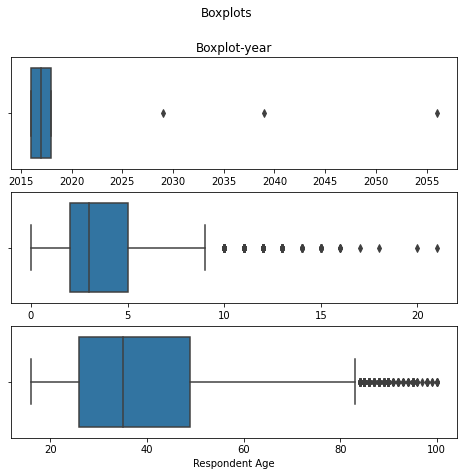

In [11]:
# Checking for Outliers

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,7))
fig.suptitle('Boxplots')
sns.boxplot(df['year'], ax=ax1)
sns.boxplot(df['household_size'], ax=ax2)
sns.boxplot(df['Respondent Age'], ax=ax3)
ax1.set_title('Boxplot-year')

plt.show()

In [12]:
# Checking for Anomalies
#
#Checking on year variable
q1_1, q3_1 = np.percentile(df['year'], [25, 75]) 
iqr1 = q3_1 - q1_1
l_bound = q1_1 - (1.5*iqr1)
u_bound = q3_1 + (1.5 * iqr1)
print("year iqr=",iqr1)

#Checking on household_size variable
q1_2, q3_2 = np.percentile(df['household_size'], [25, 75]) 
iqr2 = q3_2 - q1_2
l_bound = q1_2 - (1.5*iqr2)
u_bound = q3_2 + (1.5 * iqr2)
print("household_size iqr=",iqr2)

#Checking on Respondent Age
q1_3, q3_3 = np.percentile(df['household_size'], [25, 75]) 
iqr3 = q3_3 - q1_3
l_bound = q1_3 - (1.5*iqr2)
u_bound = q3_3 + (1.5 * iqr3)
print("Respondent Age iqr=",iqr3)

#there are anomalies on household_size and respondent age variables,after running
#the data cleaning procedures we will check if the problem is solved

year iqr= 2.0
household_size iqr= nan
Respondent Age iqr= nan


In [13]:
# Identifying the Missing Data
#
df.isnull().values.any()

True

In [14]:
# Dealing with the Missing Data
#
df.isnull().sum()

#Dropping null values
df.dropna(axis=0,inplace=True)


In [15]:
## More data cleaning procedures
#Checking for duplicates
df.duplicated().any()


False

In [16]:
#Renaming Column names

df.rename(columns = {'The relathip with head' : 'The relationship with head', 'Level of Educuation ' : 'Level of Education '}, inplace = True)

In [17]:
#Checking on dataset year column information

df.year.unique()

#There are years out of range:2029,2056,2039 that should be removed

df.drop(df[df['year']==2029].index,inplace=True)
df.drop(df[df['year']==2056].index,inplace=True)
df.drop(df[df['year']==2039].index,inplace=True)

#Checking on the changes
df.year.unique()


array([2018, 2016, 2017])

In [18]:
#Checking the information of our new dataset

df.nunique()

country                          4
year                             3
uniqueid                      8687
Has a Bank account               2
Type of Location                 2
Cell Phone Access                2
household_size                  21
Respondent Age                  85
gender_of_respondent             2
The relationship with head       6
marital_status                   5
Level of Educuation              7
Type of Job                     10
dtype: int64

In [19]:
# Checking if Anomalies have been dealt with
#
#Checking on year variable
q1_1, q3_1 = np.percentile(df['year'], [25, 75]) 
iqr1 = q3_1 - q1_1
l_bound = q1_1 - (1.5*iqr1)
u_bound = q3_1 + (1.5 * iqr1)
print("year iqr=",iqr1)

#Checking on household_size variable
q1_2, q3_2 = np.percentile(df['household_size'], [25, 75]) 
iqr2 = q3_2 - q1_2
l_bound = q1_2 - (1.5*iqr2)
u_bound = q3_2 + (1.5 * iqr2)
print("household_size iqr=",iqr2)

#Checking on Respondent Age
q1_3, q3_3 = np.percentile(df['household_size'], [25, 75]) 
iqr3 = q3_3 - q1_3
l_bound = q1_3 - (1.5*iqr2)
u_bound = q3_3 + (1.5 * iqr3)
print("Respondent Age iqr=",iqr3)


year iqr= 2.0
household_size iqr= 3.0
Respondent Age iqr= 3.0


# 6.Exploratory Analysis

6.1)Univariate Analysis

AxesSubplot(0.125,0.125;0.775x0.755)


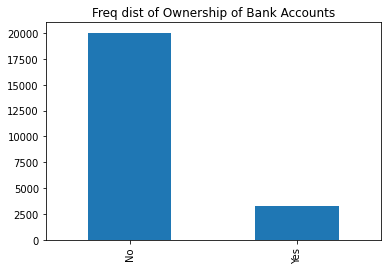

In [20]:
#Bar Graph to check on Ownership of Bank Accounts

print(df['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Ownership of Bank Accounts'))

#From the bar graph a ,majority of the respondents don't own bank accounts


AxesSubplot(0.125,0.125;0.775x0.755)


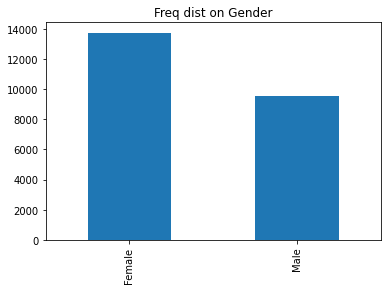

In [21]:
#Bar Graph to check on the gender of respondent

print(df['gender_of_respondent'].value_counts().plot.bar(title='Freq dist on Gender'))

#From the bar graph a ,majority of the respondents are female

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


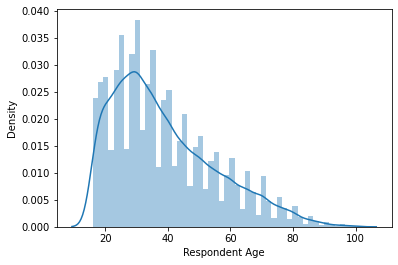

In [22]:
#Checking the Age distribution of the respondents

sns.distplot(df['Respondent Age'], hist=True)

#From the distribution plot, we can see the data on age is positively skewed
#The peak of the distribution is around 30 years of age from the distribution plot below.

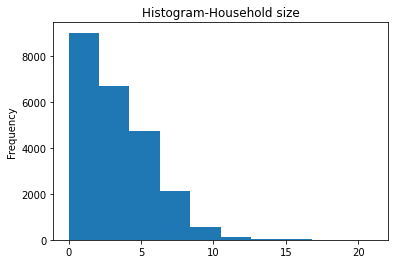

In [23]:
#Histogram on Household Size
#
df['household_size'].plot.hist(title='Histogram-Household size')

#Majority of households have less than 2 members

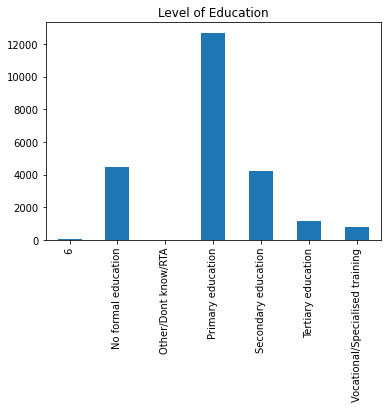

In [24]:
#Bar Graph on Level of Education

df['Level of Educuation'].value_counts().sort_index().plot.bar(title='Level of Education')

#Majority of the respondents only reached Primary level of Education

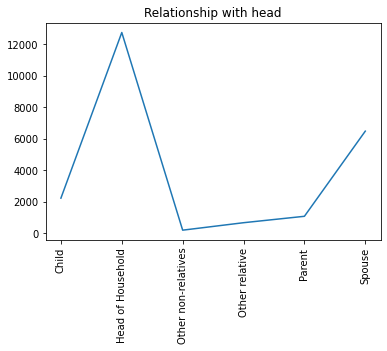

In [25]:
#Line Chart on relationship with household head

df['The relationship with head'].value_counts().sort_index().plot.line(title='Relationship with head',rot=90)

#Most of the respondents are the household heads as shown be the below line graph


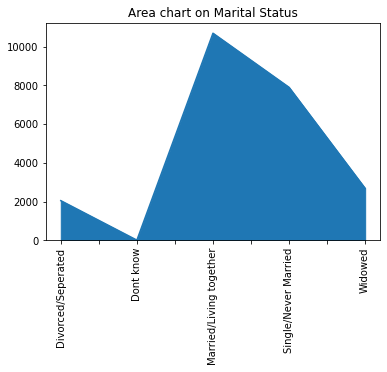

In [26]:
#Area graph on Marital Status

df['marital_status'].value_counts().sort_index().plot.area(title='Area chart on Marital Status',rot=90)

#Most Respondents are either marred or living together with their partners and 
#Very few dont know their marital status


In [27]:
#Descriptive Statistics on year,household_size, Respondent Age variables

df.describe()

,year,household_size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


6.2) Bivariate Analysis

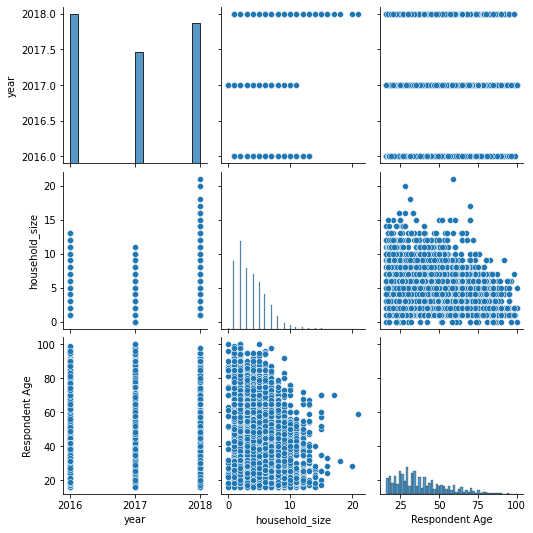

In [33]:
# Ploting the bivariate summaries and recording our observations

sns.pairplot(df)
plt.show()

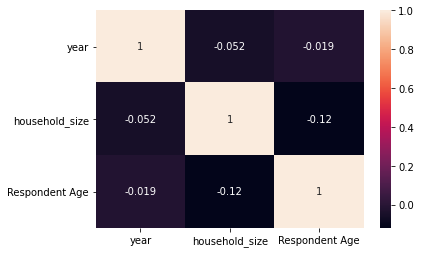

In [35]:
# Plotting heatmap with correlations between our variables 
sns.heatmap(df.corr(),annot=True)
plt.show()

The three variables(year,household_size,Respondent Age) have a very weak to no correlation with each other

6.3)Multivariate Aanlysis


6.3.a)Principal Factor Analysis(PCA)

In [57]:
#Encoding our categories of interest and creating new columns for th eencoded categories of variables of interest

df["Type of Location"] = df["Type of Location"].astype('category')
df["Type of Location-E"] = df["Type of Location"].cat.codes

df["Cell Phone Access"] = df["Cell Phone Access"].astype('category')
df["Cell Phone Access-E"] = df["Cell Phone Access"].cat.codes


df["gender_of_respondent"] = df["gender_of_respondent"].astype('category')
df["gender_of_respondent-E"] = df["gender_of_respondent"].cat.codes

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level of Educuation,Type of Job,Type of Location-E,Cell Phone Access-E,gender_of_respondent-E
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,0,1,0
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,0,0,0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,1,1
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,0,1,0
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,1


In [75]:
#Preprocessing
# 
X = df[['Cell Phone Access-E','Type of Location-E','gender_of_respondent-E','Respondent Age','household_size']]
Y = df['Has a Bank account']


In [71]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
#Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [74]:
#Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.28618188, 0.26146473, 0.250936  , 0.20141739])